In [1]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [3]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [4]:
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [5]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [6]:
df.groupby('Contract')['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: count, dtype: int64

In [7]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [8]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

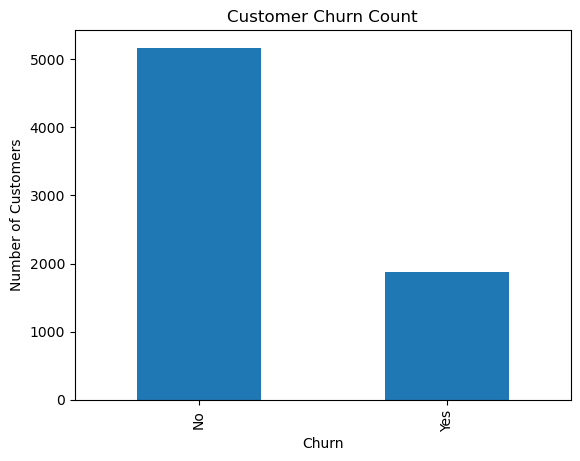

In [9]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar')
plt.title("Customer Churn Count")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [12]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [13]:
df.to_csv("Cleaned_Telco_Churn.csv", index=False)